In [1]:
import sys
from collections import OrderedDict
import scipy.stats
import numpy as np
import pandas as pd
import pylogit as pl
import matplotlib.pyplot as plt

sys.path.insert(0, '../src')
from visualization import predictive_viz as viz

%matplotlib inline

/Users/timothyb0912/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Generate fake data

In [2]:
np.random.seed(1019)

num_obs = 500
x_1 = scipy.stats.gamma.rvs(a=4, scale=0.5, size=num_obs)

def logistic(x):
    v = -2 + 2 * x - x**2
    neg_v = np.clip(-1 * v, -1e700, 1e300)
    return 1 / (1 + np.exp(neg_v))

y_probs_1 = logistic(x_1)

x = np.concatenate((x_1[:, None], np.zeros(num_obs)[:, None]),
                   axis=1).ravel()

y_probs = np.concatenate((y_probs_1[:, None], (1 - y_probs_1)[:, None]),
                   axis=1).ravel()

obs_ids = np.repeat(np.arange(num_obs) + 1 , 2)

y = viz.simulate_choice_vector(y_probs, obs_ids).ravel()

df = pd.DataFrame({'obs_id': obs_ids,
                   'alt_id': np.tile(np.array([1, 2]), num_obs),
                   'x': x, 'sin_x':np.sin(x),
                   'x2':x**2, 'x3':x**3,
                   'x4':x**4, 'x5':x**5,
                   'y': y})


Simulating Choices: 100%|██████████| 500/500 [00:00<00:00, 28154.98it/s]


# Generate correct and incorrect specifications

In [3]:
bad_spec = OrderedDict()
bad_names = OrderedDict()

bad_spec['intercept'] = [1]
bad_names['intercept'] = ['intercept']

bad_spec['x'] = 'all_same'
bad_names['x'] = 'x'

good_spec = OrderedDict()
good_names = OrderedDict()

good_spec['intercept'] = [1]
good_names['intercept'] = ['intercept']

good_spec['x'] = 'all_same'
good_names['x'] = 'x'

good_spec['x2'] = 'all_same'
good_names['x2'] = 'x2'

overfit_spec = OrderedDict()
overfit_names = OrderedDict()

overfit_spec['intercept'] = [1]
overfit_names['intercept'] = ['intercept']

overfit_spec['x'] = 'all_same'
overfit_names['x'] = 'x'

overfit_spec['sin_x'] = 'all_same'
overfit_names['sin_x'] = 'sin_x'

overfit_spec['x3'] = 'all_same'
overfit_names['x3'] = 'x3'

overfit_spec['x5'] = 'all_same'
overfit_names['x5'] = 'x5'


In [4]:
# Estimate both models
bad_mnl = pl.create_choice_model(df,
                                 'alt_id',
                                 'obs_id',
                                 'y',
                                 bad_spec,
                                 model_type='MNL',
                                 names=bad_names)
bad_mnl.fit_mle(np.zeros(len(bad_names)), method='bfgs')
bad_mnl.get_statsmodels_summary()

Log-likelihood at zero: -346.5736
Initial Log-likelihood: -346.5736
Estimation Time for Point Estimation: 0.01 seconds.
Final log-likelihood: -174.7853


/Users/timothyb0912/anaconda/lib/python2.7/site-packages/scipy/optimize/_minimize.py:507: RuntimeWarning: Method bfgs does not use Hessian information (hess).
  RuntimeWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Multinomial Logit Model Regression Results                    
===================================================================================
Dep. Variable:                           y   No. Observations:                  500
Model:             Multinomial Logit Model   Df Residuals:                      498
Method:                                MLE   Df Model:                            2
Date:                     Sun, 10 Jun 2018   Pseudo R-squ.:                   0.496
Time:                             18:04:38   Pseudo R-bar-squ.:               0.490
AIC:                               353.571   Log-Likelihood:               -174.785
BIC:                               362.000   LL-Null:                      -346.574
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0204      0.327     -0.062      0.950      -0.661       0.621
x             -1.1008      0.206     -5.350      0.000      -1.504      -0.698
==============================================================================
"""

In [5]:
# Estimate both models
good_mnl = pl.create_choice_model(df,
                                 'alt_id',
                                 'obs_id',
                                 'y',
                                 good_spec,
                                 model_type='MNL',
                                 names=good_names)
good_mnl.fit_mle(np.zeros(len(good_names)), method='bfgs')
good_mnl.get_statsmodels_summary()

Log-likelihood at zero: -346.5736
Initial Log-likelihood: -346.5736
Estimation Time for Point Estimation: 0.01 seconds.
Final log-likelihood: -171.4051


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Multinomial Logit Model Regression Results                    
===================================================================================
Dep. Variable:                           y   No. Observations:                  500
Model:             Multinomial Logit Model   Df Residuals:                      497
Method:                                MLE   Df Model:                            3
Date:                     Sun, 10 Jun 2018   Pseudo R-squ.:                   0.505
Time:                             18:04:38   Pseudo R-bar-squ.:               0.497
AIC:                               348.810   Log-Likelihood:               -171.405
BIC:                               361.454   LL-Null:                      -346.574
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.7237      0.806     -2.139      0.032      -3.303      -0.144
x              1.3849      1.101      1.258      0.209      -0.773       3.543
x2            -0.7744      0.355     -2.184      0.029      -1.469      -0.079
==============================================================================
"""

In [6]:
# Estimate both models
overfit_mnl = pl.create_choice_model(df,
                                 'alt_id',
                                 'obs_id',
                                 'y',
                                 overfit_spec,
                                 model_type='MNL',
                                 names=overfit_names)
overfit_mnl.fit_mle(np.zeros(len(overfit_names)), method='bfgs')
overfit_mnl.get_statsmodels_summary()

Log-likelihood at zero: -346.5736
Initial Log-likelihood: -346.5736
Estimation Time for Point Estimation: 0.03 seconds.
Final log-likelihood: -170.1661


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Multinomial Logit Model Regression Results                    
===================================================================================
Dep. Variable:                           y   No. Observations:                  500
Model:             Multinomial Logit Model   Df Residuals:                      495
Method:                                MLE   Df Model:                            5
Date:                     Sun, 10 Jun 2018   Pseudo R-squ.:                   0.509
Time:                             18:04:38   Pseudo R-bar-squ.:               0.495
AIC:                               350.332   Log-Likelihood:               -170.166
BIC:                               371.405   LL-Null:                      -346.574
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.1008      1.346     -2.304      0.021      -5.738      -0.463
x            -55.3869     48.348     -1.146      0.252    -150.146      39.373
sin_x         58.7371     50.007      1.175      0.240     -39.275     156.749
x3             8.4129      7.589      1.109      0.268      -6.460      23.286
x5            -0.2873      0.272     -1.058      0.290      -0.819       0.245
==============================================================================
"""

In [7]:
# Get the probabilities of y = 1 according to the three models
# and order the probabilities according to increasing x-values
alt_1_rows = np.where((df['alt_id'] == 1).values)[0]
alt_1_order = np.argsort(x_1)

p_underfit = bad_mnl.long_fitted_probs[alt_1_rows][alt_1_order]
p_true = good_mnl.long_fitted_probs[alt_1_rows][alt_1_order]
p_overfit = overfit_mnl.long_fitted_probs[alt_1_rows][alt_1_order]

In [8]:
p_true.mean(), p_underfit.mean(), p_overfit.mean()

(0.13199999970126883, 0.13199999999997622, 0.13199999995462905)

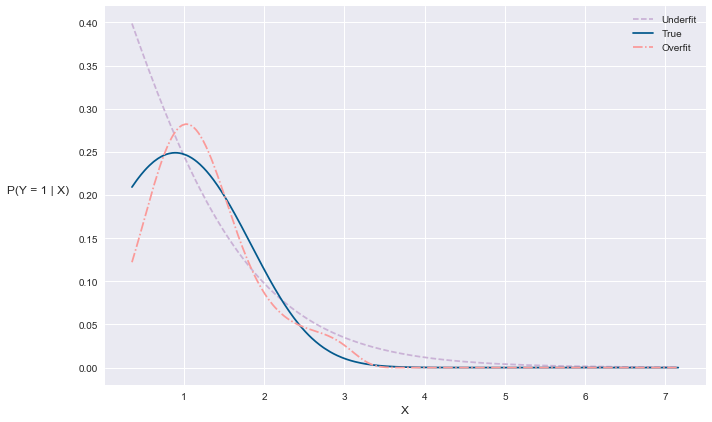

In [9]:
x_line = x_1[alt_1_order]

overfit_color =\
    (0.984313725490196, 0.6039215686274509, 0.6)
# underfit_color = '#a6bddb'
underfit_color =\
    (0.792156862745098, 0.6980392156862745, 0.8392156862745098)

fig, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(x_line, p_underfit, linestyle='--',
        c=underfit_color, label='Underfit')
ax.plot(x_line, p_true, c='#045a8d', label='True')
ax.plot(x_line, p_overfit, linestyle='-.',
        c=overfit_color, label='Overfit')

# ax.set_xlabel('Bicycle Travel Distance (miles)', fontsize=12)
# ax.set_ylabel('Probability\nof Bicycling',
#               rotation=0, labelpad=40, fontsize=12)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('P(Y = 1 | X)',
              rotation=0, labelpad=40, fontsize=12)

ax.legend(loc='best')

fig.tight_layout()
fig.savefig('../reports/figures/underfitting_example.pdf',
            dpi=500, bbox_inches='tight')